In [88]:
# import statistical tools
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy.contrasts import Treatment

In [89]:
# import data visualisation tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
# load data; visualisation same as Section 3.6.3
url = "/Users/arpanganguli/Documents/Finance/ISLR/Datasets/Carseats.csv"
Carseats = pd.read_csv(url, index_col = 'SlNo')

In [92]:
# view and visualise data
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
SlNo,,,,,,,,,,,
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


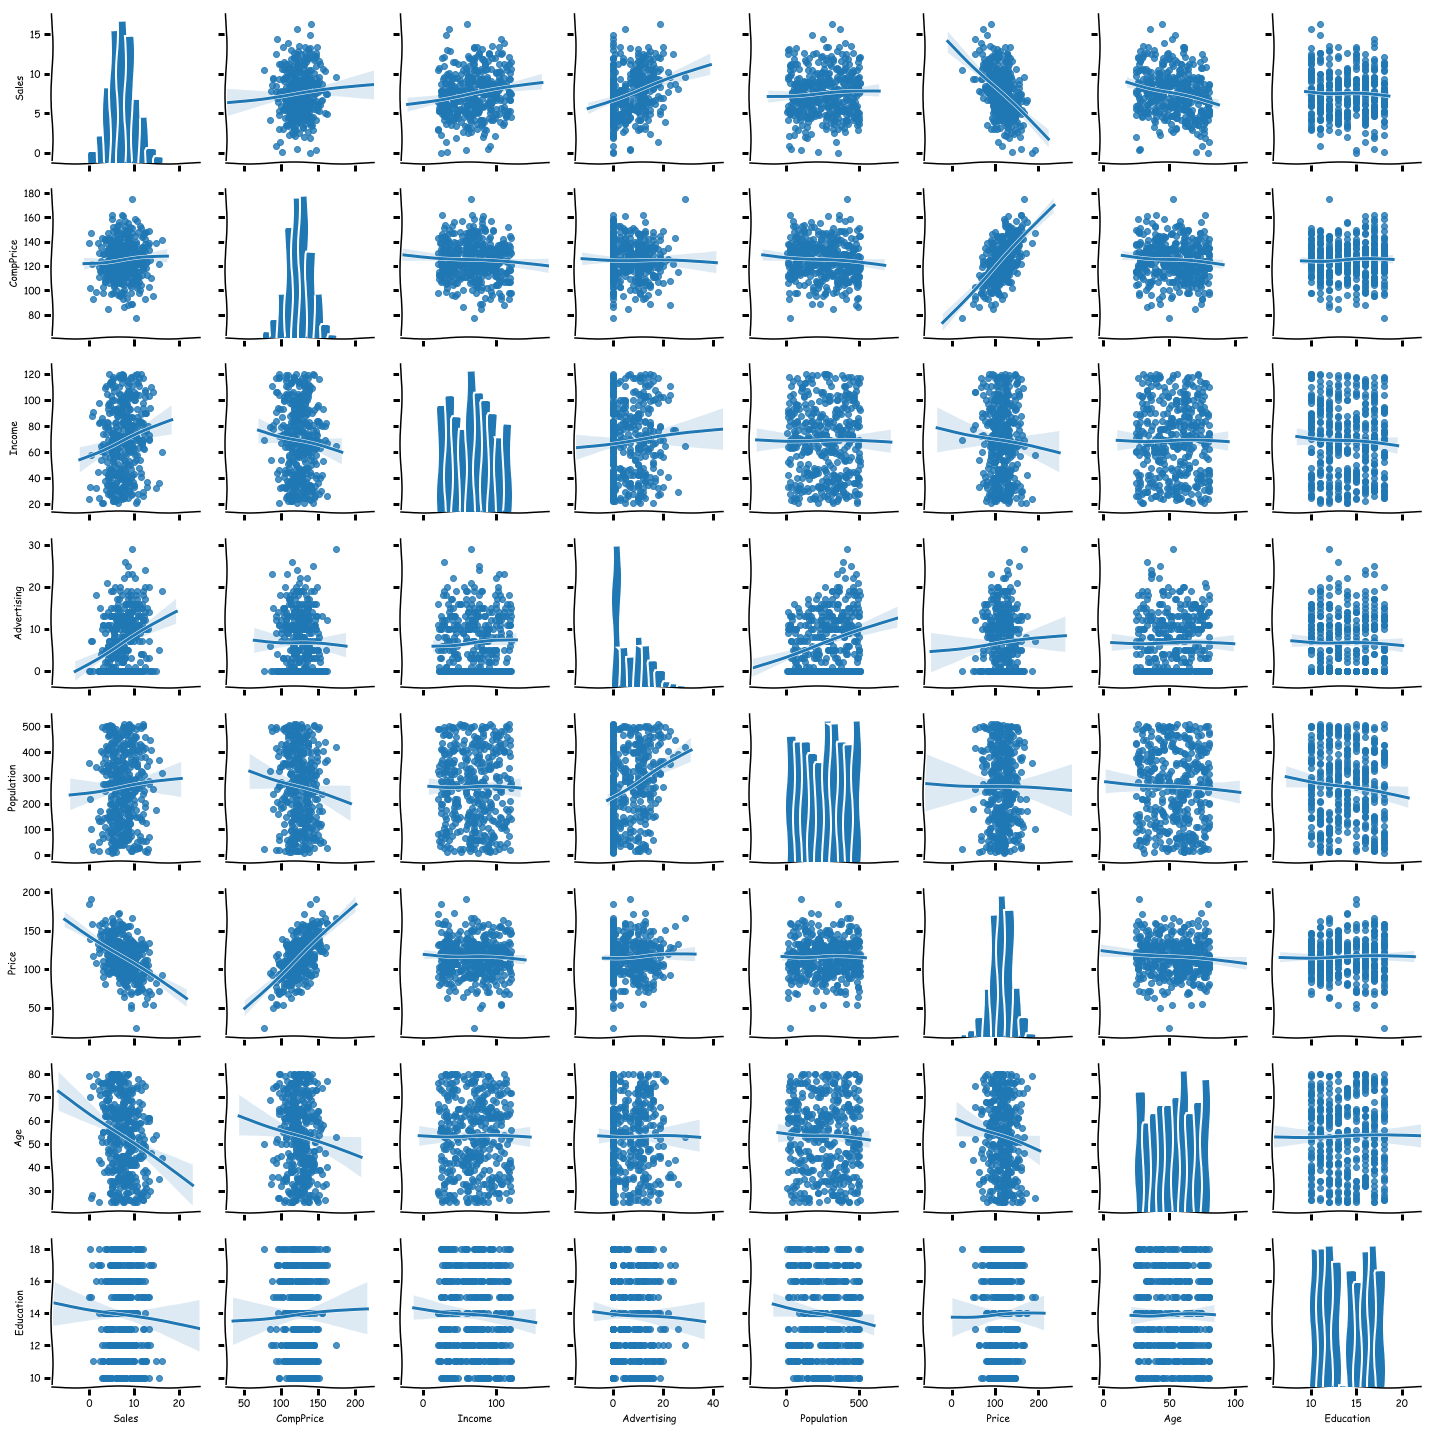

In [93]:
sns.pairplot(Carseats, kind = "reg")

In [94]:
# perform regression
Y = Carseats['Sales']
X1 = Carseats['CompPrice']
X2 = Carseats['Income']
X3 = Carseats['Advertising']
X4 = Carseats['Population']
X5 = Carseats['Price']
X6 = Carseats['ShelveLoc']
X7 = Carseats['Age']
X8 = Carseats['Education']
X9 = Carseats['Urban']
X10 = Carseats['US']

model = ols("Y~X1+X2+X3+X4+X5+X6+X7+X8+X9+X10+X2:X3+X5:X7", data = Carseats).fit()

In [95]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 09 Jan 2019   Prob (F-statistic):          6.14e-166
Time:                        20:57:43   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5756      1.009      6.519      0.000       4.592       8.559
X6[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
X6[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
X9[T.Yes]        0.1402      0.112      1.247      0.213      -0.081       0.361
X10[T.Yes]      -0.1576      0.149     -1.058      0.291      -0.450       0.135
X1               0.0929      0.004     22.567      0.000       0.085       0.101
X2               0.0109      0.003      4.183      0.000       0.006       0.016
X3               0.0702      0.023      3.107      0.002       0.026       0.115
X4               0.0002      0.000      0.433      0.665      -0.001       0.001
X5              -0.1008      0.007    -13.549      0.000      -0.115      -0.086
X7              -0.0579      0.016     -3.633      0.000      -0.089      -0.027
X8              -0.0209      0.020     -1.063      0.288      -0.059       0.018
X2:X3            0.0008      0.000      2.698      0.007       0.000       0.001
X5:X7            0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
# understanding dummy variables
levels = [1, 2, 3]
contrast = Treatment(reference=0).code_without_intercept(levels)

In [97]:
contrast.matrix

array([[0., 0.],
       [1., 0.],
       [0., 1.]])